In [ ]:
!pip install datascience

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 725.0/725.0 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 23.5 MB/s eta 0:00:00


In [ ]:
from datascience import *
%matplotlib inline
path_data = 'data/'
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np

# Causality

두 표본을 비교하는 우리의 방법은 무작위 대조 실험 분석에서 강력하게 사용됩니다. 이러한 실험에서 처치군과 대조군이 무작위로 할당되므로, 처치가 전혀 효과가 없을 때 우연히 일어날 수 있는 것과 그들의 결과 차이를 비교할 수 있습니다. 관측된 차이가 순전히 우연으로 예측할 수 있는 것보다 더 두드러지면, 우리는 *인과관계*의 증거를 갖게 될 것입니다. 개인을 처치군과 대조군에 비편향적으로 할당하기 때문에, 두 그룹의 결과 차이는 처치에 기인할 수 있습니다.

무작위 대조 실험 분석의 핵심은 우연이 정확히 어떻게 그림에 들어가는지 이해하는 것입니다. 이것은 명확한 귀무가설과 대립가설을 설정하는 데 도움이 됩니다. 일단 그것이 완료되면, 이전 섹션의 방법을 사용하여 분석을 완료할 수 있습니다.

예제에서 이를 수행하는 방법을 살펴보겠습니다.

## 만성 요통 치료하기: 무작위 대조 시험
성인의 요통은 매우 지속적이고 치료하기 어려울 수 있습니다. 일반적인 방법은 코르티코스테로이드부터 침술까지 다양합니다. A [randomized controlled trial (RCT)](https://www.ncbi.nlm.nih.gov/pubmed/11376175) examined the effect of using Botulinum Toxin A (BTA) as a treatment. 보툴리눔 독소는 보툴리눔 중독증을 유발하는 신경독성 단백질입니다. [Wikipedia](https://en.wikipedia.org/wiki/Botulinum_toxin) 보툴리눔이 "알려진 가장 급성 치명적인 독소"라고 말합니다. 보툴리눔 독소에는 7가지 유형이 있습니다. 보툴리눔 독소 A는 인간에게 질병을 일으킬 수 있는 유형 중 하나이지만, 근육과 관련된 다양한 질병을 치료하기 위해 의학에서도 사용됩니다. The RCT analyzed by Foster, Clapp, and Jabbari in 2001 examined it as a treatment for low back pain.

요통이 있는 31명의 환자가 처치군과 대조군으로 무작위화되었으며, 처치군에 15명, 대조군에 16명이 배정되었습니다. 대조군은 생리식염수를 받았고, 의사와 환자 모두 어느 그룹에 속해 있는지 모르도록 이중맹검으로 시행되었습니다.

연구 시작 8주 후, 처치군 15명 중 9명과 대조군 16명 중 2명이 (연구자가 사용한 정확한 정의에 따라) 통증 완화를 경험했습니다. 이러한 데이터는 `bta` 테이블에 있으며 처치가 명확한 이점이 있음을 보여주는 것으로 보입니다.

In [ ]:
bta = Table.read_table(path_data + 'bta.csv')
bta.show()

Group,Result
Control,1
Control,1
Control,0
Control,0
Control,0
Control,0
Control,0
Control,0
Control,0
Control,0


각 그룹에서 몇 명의 환자가 회복되었는지 살펴보겠습니다. 세는 것은 0과 1을 더하는 것과 같다는 것을 기억하세요. 대조군의 1의 합은 통증 완화를 경험한 대조군 환자의 수입니다.

In [ ]:
bta.group('Group')

Group,count
Control,16
Treatment,15


In [ ]:
bta.group('Group', sum)

Group,Result sum
Control,2
Treatment,9


세는 것이 0과 1의 *합*과 같으므로, 통증 완화를 경험한 환자의 *비율*은 0과 1의 *평균*입니다. 이는 각 그룹의 총 환자 수로 나눈 합입니다.

In [ ]:
bta.group('Group', np.average)

Group,Result average
Control,0.125
Treatment,0.6


처치군에서는 60%의 환자가 통증 완화를 경험했으며, 대조군에서는 12.5%만이 통증 완화를 경험했습니다. 어떤 환자도 부작용을 겪지 않았습니다.

따라서 보툴리눔 독소 A가 식염수보다 더 나은 것으로 나타납니다. 하지만 결론은 아직 확실하지 않습니다. 환자들이 무작위로 두 그룹에 할당되었으므로, 아마도 차이는 단지 우연 때문일 수 있을까요?

이것이 무엇을 의미하는지 이해하려면, 연구의 31명의 환자 중 일부는 처치의 도움 없이도 다른 사람들보다 단순히 회복 능력이 더 나았을 가능성을 고려해야 합니다. 그러한 환자들의 비정상적으로 큰 비율이 단지 우연히 처치군에 할당되었다면 어떻게 될까요? 그렇다면 처치가 대조군의 식염수보다 더 나은 효과가 없더라도, 처치군의 결과가 대조군의 결과보다 더 좋아 보일 수 있습니다.

이 가능성을 고려하기 위해, 우연 모델을 신중하게 설정하는 것으로 시작하겠습니다.

## 잠재적 결과
환자들이 두 그룹으로 무작위화되기 전에, 우리의 마음은 본능적으로 각 환자에 대한 두 가지 가능한 결과를 상상합니다: 처치군에 할당되었을 때 환자가 가질 결과와, 대조군에 할당되었을 때 같은 환자가 가질 결과입니다. 이들을 환자의 두 가지 *잠재적 결과*라고 합니다.

따라서 31개의 잠재적 처치 결과와 31개의 잠재적 대조 결과가 있습니다. 질문은 각각 31개의 결과로 이루어진 이 두 세트의 분포에 관한 것입니다. 그들은 동일한가요, 아니면 다른가요?

아직 이에 답할 수 없습니다. 왜냐하면 각 그룹의 31개 값을 모두 볼 수 없기 때문입니다. 우리는 단지 잠재적 대조 결과 중 무작위로 선택된 16개와 *나머지* 15명 환자의 처치 결과만 볼 수 있습니다.

Here is a good way to visualize the setting. Each patient has a two-sided ticket:


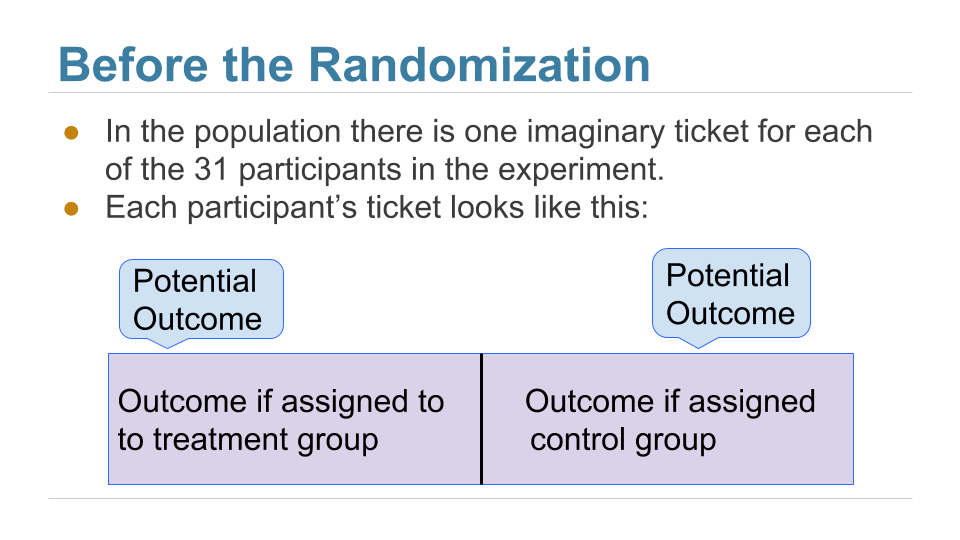

After the randomization, we get to see the right half of a randomly selected set of tickets, and the left half of the remaining group.



The table `observed_outcomes` collects the information about every patient's potential outcomes, leaving the unobserved half of each "ticket" blank.  (It's just another way of thinking about the `bta` table, carrying the same information.)

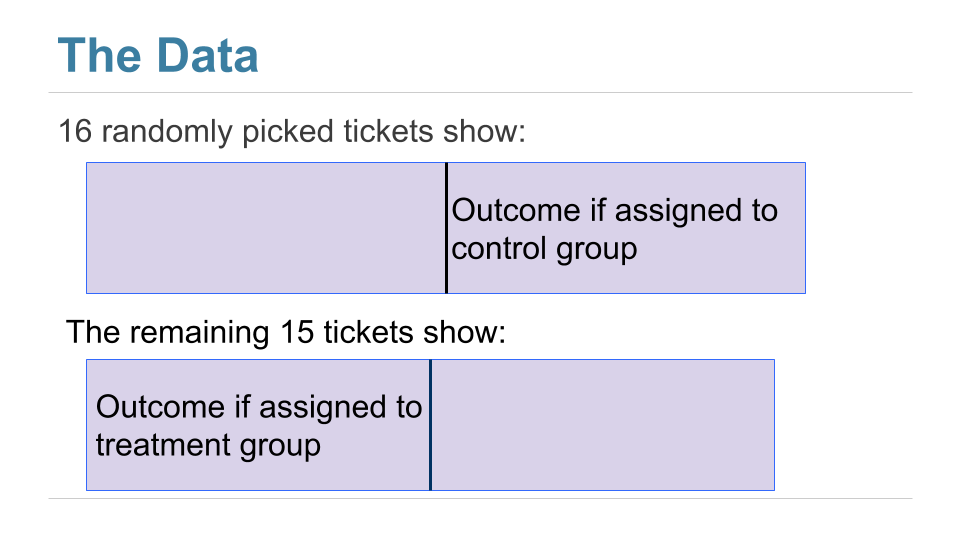

In [ ]:
observed_outcomes = Table.read_table(path_data + "observed_outcomes.csv")
observed_outcomes.show()

Group,Outcome if assigned treatment,Outcome if assigned control
Control,Unknown,1
Control,Unknown,1
Control,Unknown,0
Control,Unknown,0
Control,Unknown,0
Control,Unknown,0
Control,Unknown,0
Control,Unknown,0
Control,Unknown,0
Control,Unknown,0


## 가설
The question is whether the treatment does anything. In terms of the table `observed_outcomes`, the question is whether the distribution of the 31 "treatment" values in Column 1  (including the unknown ones) is different from the distribution of the 31 "control" values in Column 2 (again including the unknown ones).

**Null Hypothesis:** The distribution of all 31 potential "treatment" outcomes is the same as that of all 31 potential "control" outcomes. Botulinum toxin A does nothing different from saline; the difference in the two samples is just due to chance.

**Alternative Hypothesis:** The distribution of 31 potential "treatment" outcomes is different from that of the 31 control outcomes. The treatment does something different from the control.

Notice that the alternative is not specifying that the treatment helps – just that it is different from the control. This is standard in medical studies because it doesn't pre-judge which way the result might go. But you are welcome to run a test for whether the treatment does better than the control. Just adjust your test statistic accordingly.

There are 31 observed outcomes jointly in the two groups. If the null hypothesis were true, it wouldn't matter which of those 31 outcomes were labeled "treatment" and which "control." Any random subset of 16 out of the 31 values could be called "control" and the remaining 15 "treatment".

We can simulate this. We can randomly permute the 31 values, split them into two groups of 16 and 15, and see how different the distributions in the two groups are. Since the data are zeros and ones, we can just see how different the two proportions are.

That's exactly what we did for A/B testing in the previous section. Sample A is now the control group and Sample B the treatment group. We will carry out the test below showing the details of all the steps. You should confirm that they are the same as the steps carried out for A/B testing.

## The Test Statistic
If the two group proportions are very different from each other, we will lean towards the alternative hypothesis that the two underlying distributions are different. So our test statistic will be the distance between the two group proportions, that is, the absolute value of the difference between them.

Large values of the test statistic will favor the alternative hypothesis over the null.

Since the two group proportions were 0.6 and 0.125, the observed value of the test statistic is $\big{\vert} 0.6 - 0.125 \big{\vert} = 0.475$.

In [ ]:
bta.group('Group', np.average)

Group,Result average
Control,0.125
Treatment,0.6


In [ ]:
observed_proportions = bta.group('Group', np.average).column(1)
observed_distance = abs(observed_proportions.item(0) - observed_proportions.item(1))
observed_distance

0.475

As we have done before, we will define a function that takes the following two arguments:

- 데이터 테이블의 이름
- the column label of the group labels

and returns the distance between the two group proportions.

In [ ]:
def distance(table, group_label):
    reduced = table.select('Result', group_label)
    proportions = reduced.group(group_label, np.average).column(1)
    return abs(proportions.item(1) - proportions.item(0))

In [ ]:
distance(bta, 'Group')

0.475

## 귀무가설 하에서 통계량 예측하기
We can simulate results under the null hypothesis, to see how our test statistic should come out if the null hypothesis is true.

### Generating One Value of the Statistic
The simulation follows exactly the same process we used in the previous section. We start by randomly permuting the all group labels and then attaching the shuffled labels to the 0/1 results.

In [ ]:
shuffled_labels = bta.sample(with_replacement=False).column(0)

In [ ]:
bta_with_shuffled_labels = bta.with_column('Shuffled Label', shuffled_labels)
bta_with_shuffled_labels.show()

Group,Result,Shuffled Label
Control,1,Control
Control,1,Control
Control,0,Treatment
Control,0,Control
Control,0,Control
Control,0,Control
Control,0,Control
Control,0,Control
Control,0,Control
Control,0,Treatment


We can now find the distance between the two proportions after the group labels have been shuffled.

In [ ]:
distance(bta_with_shuffled_labels, 'Shuffled Label')

0.21666666666666667

This is quite different from the distance between the two original proportions.

In [ ]:
distance(bta_with_shuffled_labels, 'Group')

0.475

### 순열검정
If we shuffled the labels again, how different would the new distance be? To answer this, we will define a function that simulates one simulated value of the distance under the hypothesis of random draws from the same underlying distribution. And then we will collect 20,000 such simulated values in an array.

You can see that we are doing exactly what we did in our previous examples of the permutation test.

In [ ]:
def one_simulated_distance():
    shuffled_labels = bta.sample(with_replacement = False
                                                    ).column('Group')
    shuffled_table = bta.select('Result').with_column(
        'Shuffled Label', shuffled_labels)
    return distance(shuffled_table, 'Shuffled Label')

In [ ]:
distances = make_array()

repetitions = 20000
for i in np.arange(repetitions):
    new_distance = one_simulated_distance()
    distances = np.append(distances, new_distance)

## 검정의 결론
The array `distances` contains 20,000 values of our test statistic simulated under the null hypothesis. Here is their empirical histogram along with the observed value of the statistic. To find the P-value of the test, remember that large values of the distance favor the alternative hypothesis.

Observed Distance 0.475


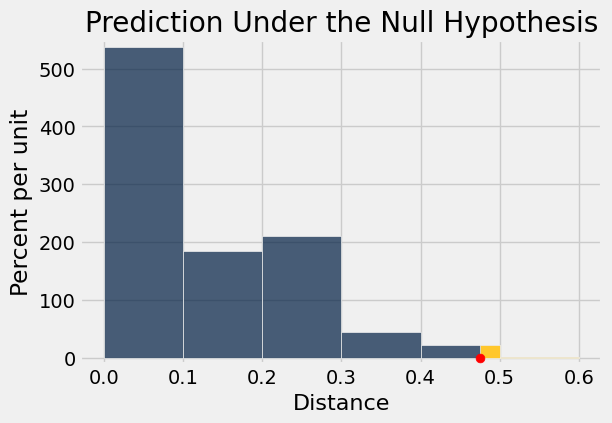

In [ ]:
Table().with_column('Distance', distances).hist(
    bins = np.arange(0, 0.7, 0.1), left_end = observed_distance)
# Plotting parameters; you can ignore the code below
plots.ylim(-0.1, 5.5)
plots.scatter(observed_distance, 0, color='red', s=40, zorder=3)
plots.title('Prediction Under the Null Hypothesis')
print('Observed Distance', observed_distance)

To find the empirical p-value numerically, we must find the proportion of simulated statistics that were equal to or larger than the observed statistic.

In [ ]:
empirical_p = np.count_nonzero(distances >= observed_distance) / repetitions
empirical_p

0.01005

This is a small p-value. The observed statistic is in the tail of the empirical histogram of the test statistic generated under the null hypothesis.

The result is statistically significant. The test favors the alternative hypothesis over the null. The evidence supports the hypothesis that the treatment is doing something.

The study reports a P-value of 0.009, or 0.9%, which is not far from our empirical value.

## Causality
Because the trials were randomized, the test is evidence that the treatment *causes* the difference. The random assignment of patients to the two groups ensures that there is no confounding variable that could affect the conclusion of causality.

If the treatment had not been randomly assigned, our test would still point toward an *association* between the treatment and back pain outcomes among our 31 patients.  But beware: without randomization, this association would not imply that the treatment caused a change in back pain outcomes.  For example, if the patients themselves had chosen whether to administer the treatment, perhaps the patients experiencing more pain would be more likely to choose the treatment *and* more likely to experience some reduction in pain even without medication.  Pre-existing pain would then be a *confounding factor* in the analysis.

## A Meta-Analysis

While the RCT does provide evidence that the botulinum toxin A treatment helped patients, a study of 31 patients isn't enough to establish the effectiveness of a medical treatment. This is not just because of the small sample size.  Our results in this section are valid for the 31 patients in the study, but we are really interested in the population of *all possible patients*.

In 2011, a group of researchers performed a [meta-analysis](https://www.ncbi.nlm.nih.gov/pubmed/21249702) of the studies on the treatment. That is, they identified all the available studies of such treatments for low-back pain and summarized the collated results.

There were several studies but not many could be included in a scientifically sound manner: "We excluded evidence from nineteen studies due to non-randomisation, incomplete or unpublished data." Only three randomized controlled trials remained, one of which is the one we have studied in this section. The meta-analysis gave it the highest assessment among all the studies (LBP stands for low-back pain): "We identified three studies that investigated the merits of BoNT for LBP, but only one had a low risk of bias and evaluated patients with non-specific LBP (N = 31)."

Putting it all together, the meta-analysis concluded, "There is low quality evidence that BoNT injections improved pain, function, or both better than saline injections and very low quality evidence that they were better than acupuncture or steroid injections. ...  Further research is very likely to have an important impact on the estimate of effect and our confidence in it. Future trials should standardize patient populations, treatment protocols and comparison groups, enlist more participants and include long-term outcomes, cost-benefit analysis and clinical relevance of findings."

It takes a lot of careful work to establish that a medical treatment has a beneficial effect. Knowing how to analyze randomized controlled trials is a crucial part of this work. Now that you know how to do that, you are well positioned to help medical and other professions establish cause-and-effect relations.